<a href="https://colab.research.google.com/github/ussalbt/datascience/blob/main/Clustering_Analysis_Customers_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [27]:
!pip install plotly
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Load Dataset

In [3]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = ['CustomerID', 'Gender','Age','Annual_Income','Spend_Score']
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Gender         200 non-null    int64
 2   Age            200 non-null    int64
 3   Annual_Income  200 non-null    int64
 4   Spend_Score    200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum().any()

False

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spend_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


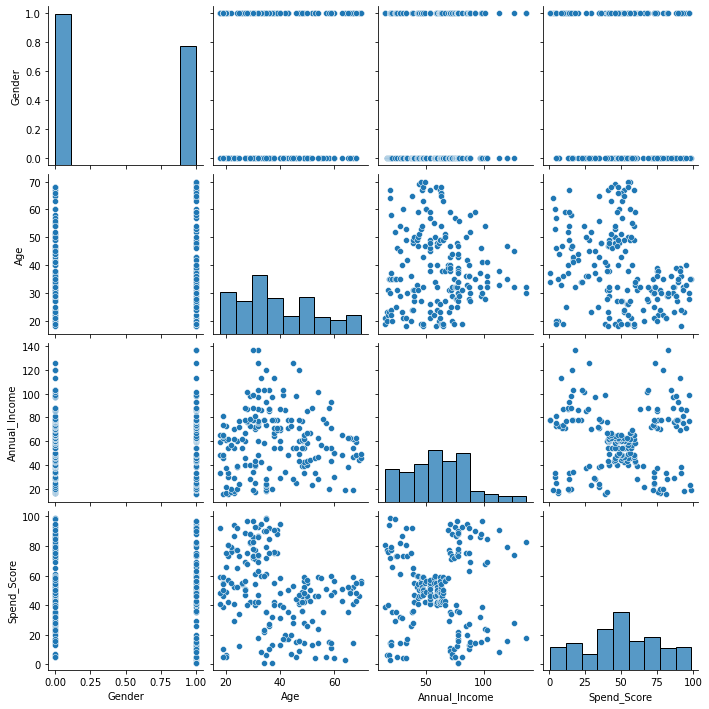

In [10]:
sns.pairplot(df.drop('CustomerID', axis = 1));

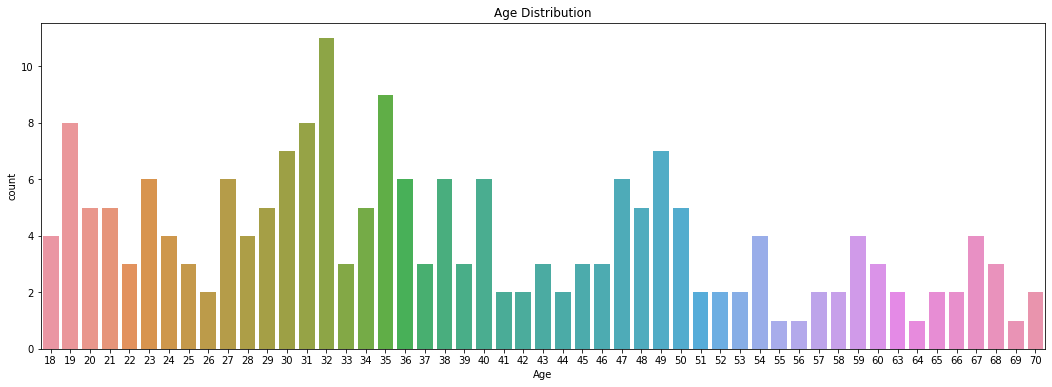

In [11]:
plt.figure(figsize=(18,6))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

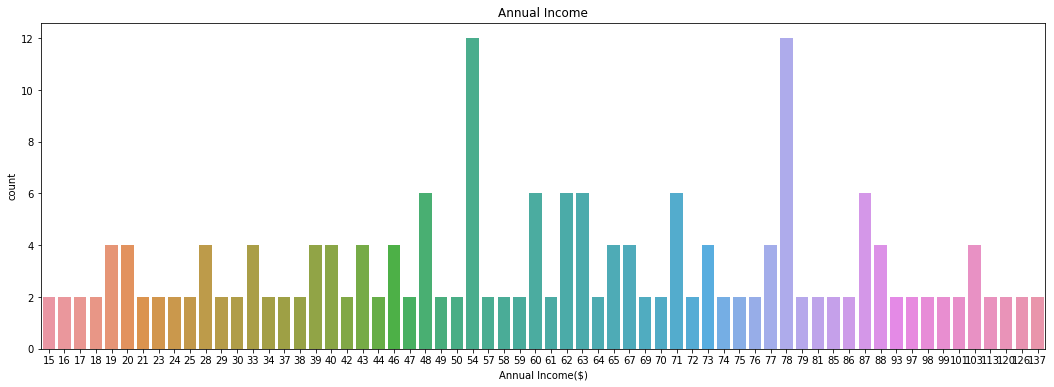

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

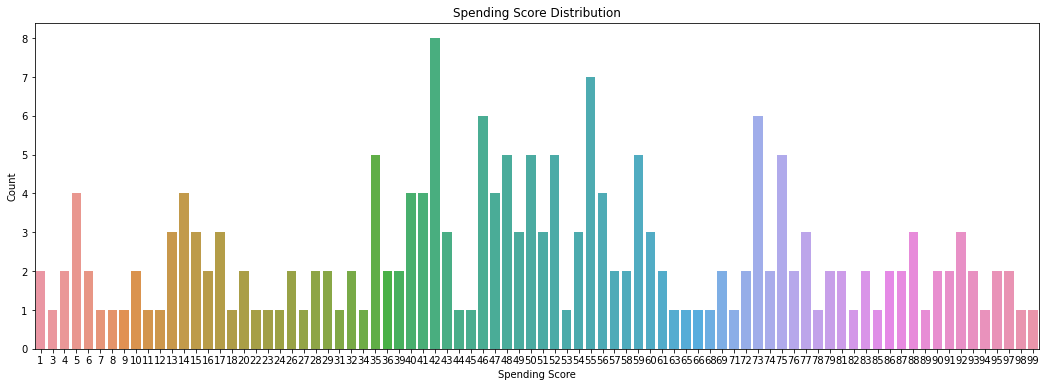

In [13]:
plt.figure(figsize=(18,6))
sns.countplot(df['Spend_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show();

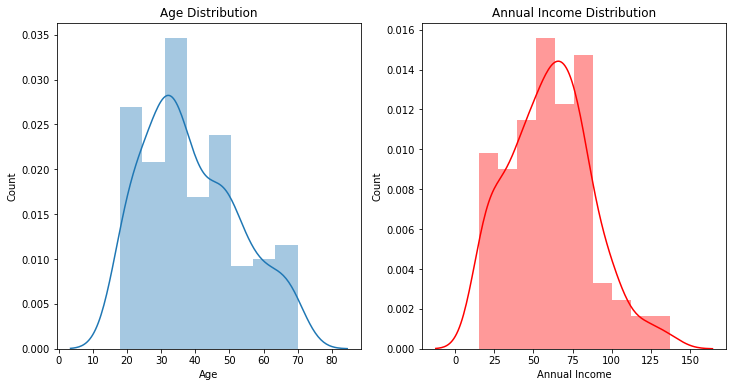

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count');

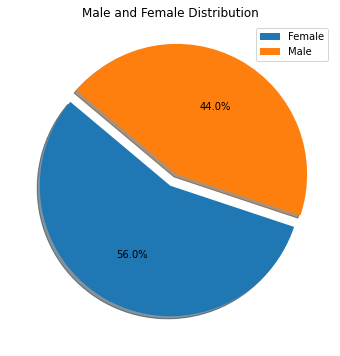

In [15]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

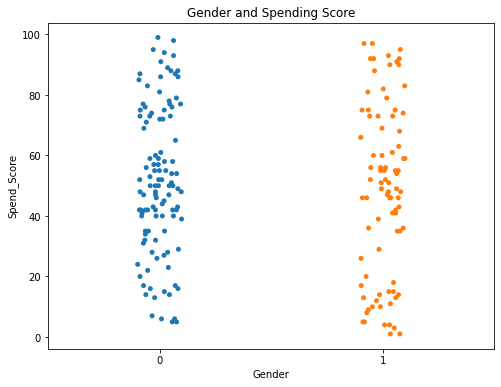

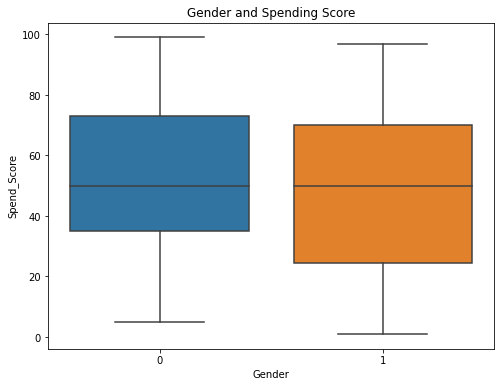

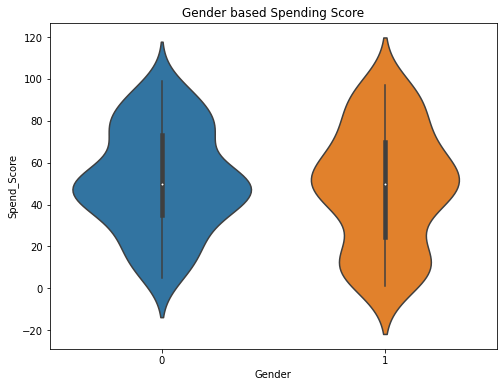

In [16]:
plt.figure(figsize=(8,6))
sns.stripplot(df['Gender'], df['Spend_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(df['Gender'], df['Spend_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(8,6))
sns.violinplot(df['Gender'],df['Spend_Score'])
plt.title('Gender based Spending Score')
plt.show();

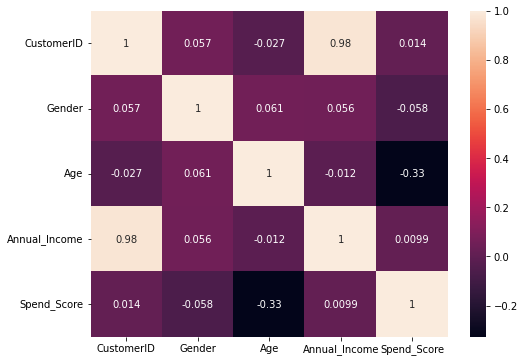

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)
plt.show();

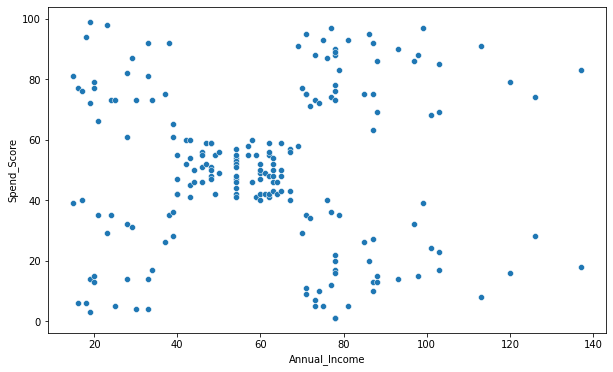

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(df['Annual_Income'], df['Spend_Score'], ax=ax)
plt.show();

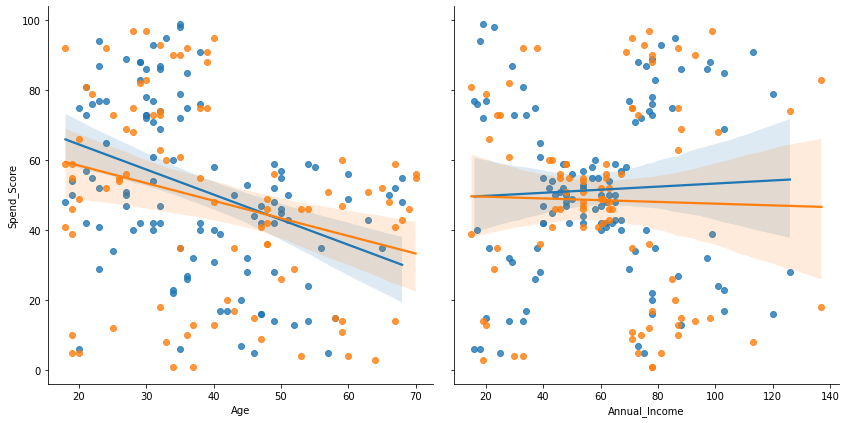

In [19]:
grid = sns.PairGrid(df, y_vars=['Spend_Score'], x_vars=["Age", "Annual_Income"], height=6, hue='Gender')
grid.map(sns.regplot);

---
---

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [22]:
df1=df[['Age', 'Spend_Score']]

#### *ii. Determine optimal number of clusters*

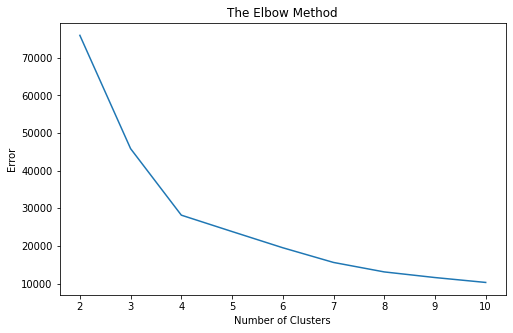

In [29]:
from sklearn.cluster import KMeans
Error =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(df1)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), Error)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show();

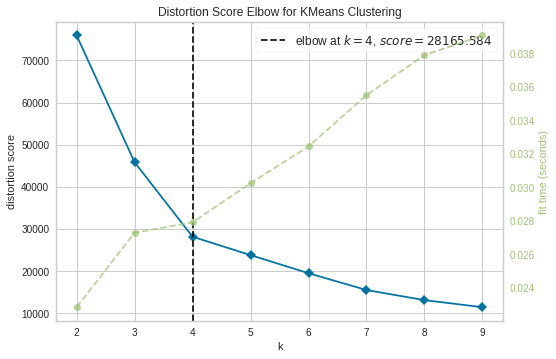

In [30]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.poof();

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [32]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(df1, labels1)}')


Silhouette Score(n=4): 0.5014655901371473


#### *iii. Apply K Means*

In [31]:
k_means1 =KMeans(n_clusters=4).fit(df1)
labels1 = k_means1.labels_
df1['cluster_id'] = labels1
df1.head()

,Age,Spend_Score,cluster_id
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


#### *iv. Visualizing and Labeling All the Clusters*

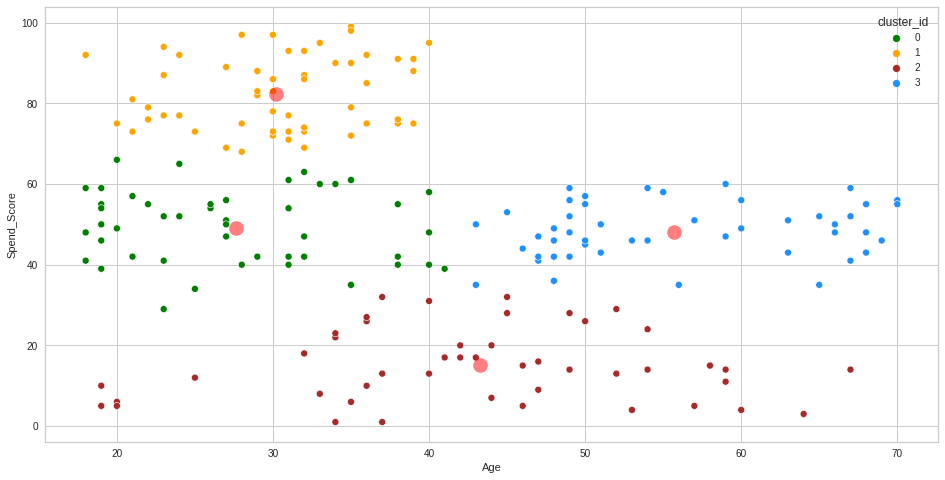

In [33]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Age', y='Spend_Score', hue='cluster_id', data=df1,palette=['green','orange','brown','dodgerblue'], legend='full')
plt.scatter(k_means1.cluster_centers_[:, 0], k_means1.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [34]:
df2=df[['Annual_Income', 'Spend_Score']]

#### *ii. Determine optimal number of clusters*

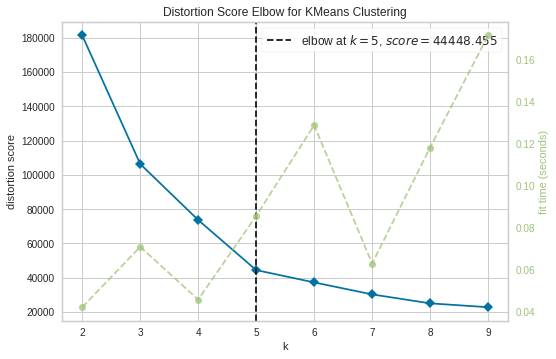

In [35]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof();

#### *iii. Apply K Means*

In [44]:
k_means2=KMeans(n_clusters=5).fit(df2)
labels2 = k_means1.labels_
df2['cluster_id'] = labels2
df2.head()

,Annual_Income,Spend_Score,cluster_id
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


#### *iv. Visualizing and Labeling All the Clusters*

In [45]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df2, labels2)}')

Silhouette Score(n=5): 0.555244436202598


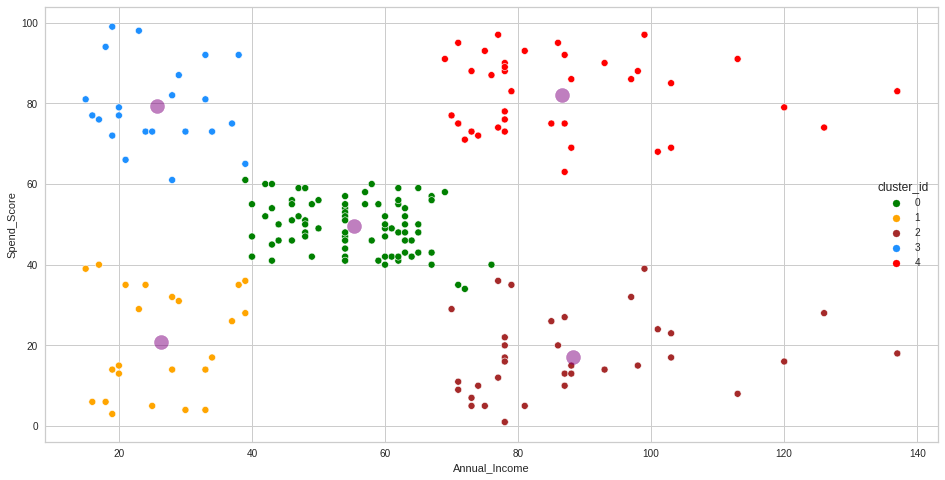

In [46]:
plt.figure(figsize=(16,8))
g=sns.scatterplot(x='Annual_Income', y='Spend_Score', hue='cluster_id', data=df2,palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.scatter(k_means2.cluster_centers_[:, 0], k_means2.cluster_centers_[:, 1], s=200, c='purple',alpha=0.5, label = 'Centroids')

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

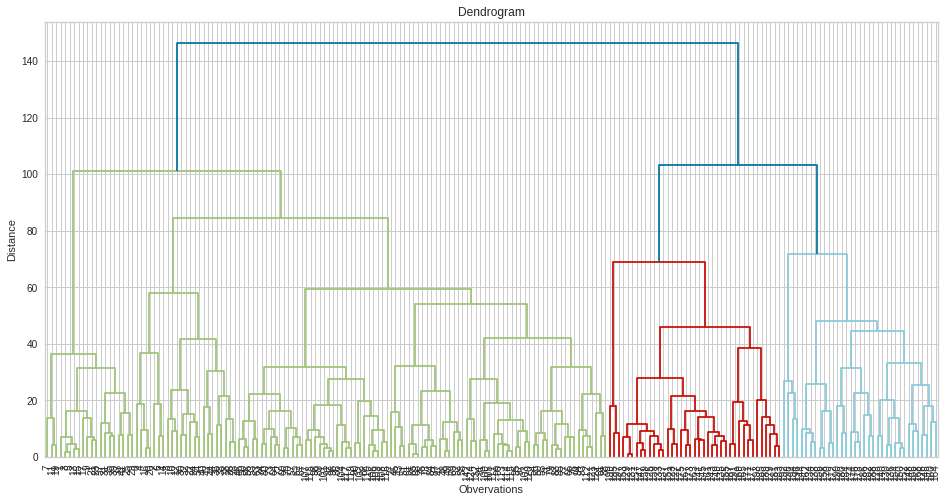

In [59]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

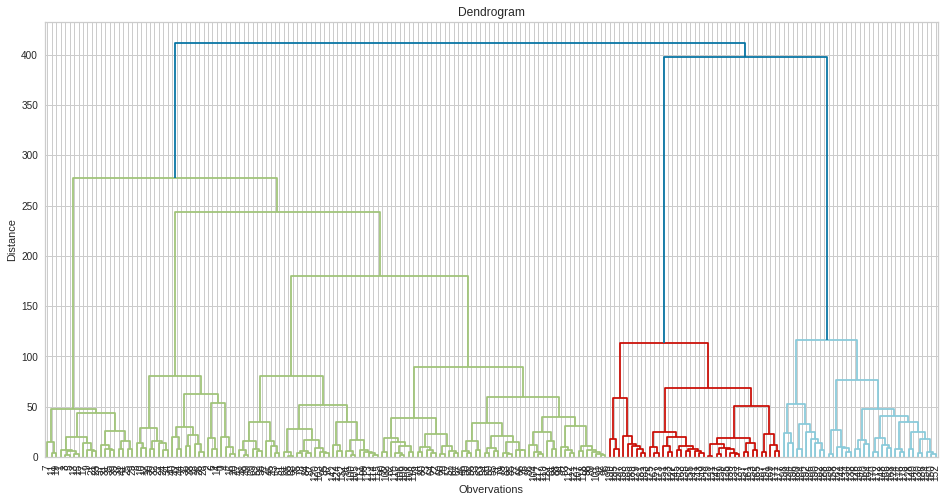

In [60]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

### Clustering based on Age and Spending Score- x1

In [68]:
df3=df[['Age',  'Spend_Score']]
df3.head()

,Age,Spend_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


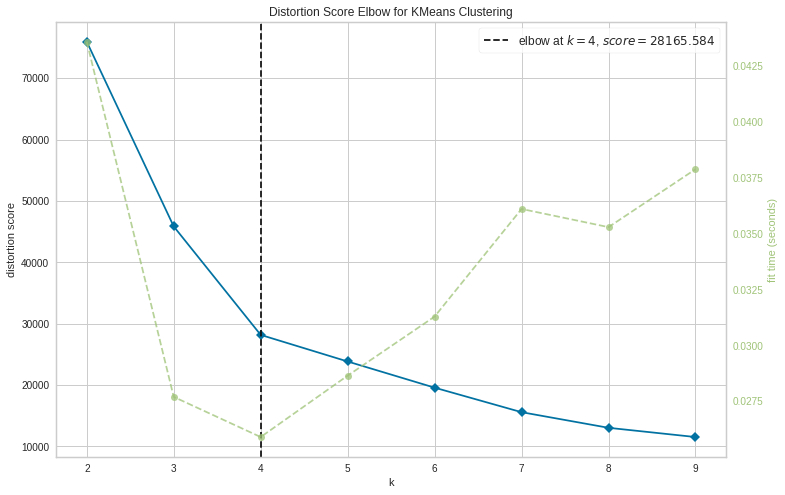

In [69]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.poof();

In [70]:
k_means3 =KMeans(n_clusters=5).fit(df3)
labels3 = k_means3.labels_
df3['cluster_id'] = labels3
df3.head(5)

,Age,Spend_Score,cluster_id
0,19,39,0
1,21,81,1
2,20,6,3
3,23,77,1
4,31,40,0


In [71]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df3, labels3)}')

Silhouette Score(n=5): 0.4488798978970294


## Clustering based on Annual Income and Spending Score- x2

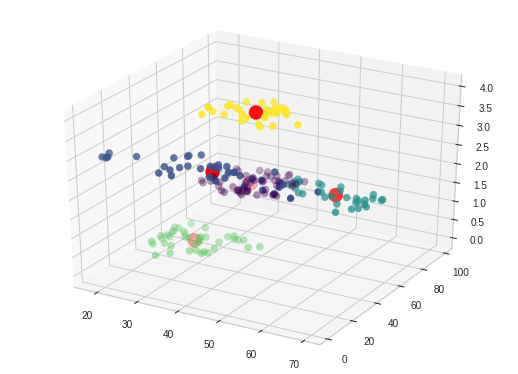

In [72]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=5).fit(df3)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [74]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df3['cluster_id'] =  k_means3.labels_
trace1 = go.Scatter3d(
    x = df3['Age'],
    y = df3['Spend_Score'],
  
    mode ='markers',
    marker = dict(color = df3['cluster_id'], size = 6, line = dict(color= df3['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers Segmentation', scene = dict(xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spend Score'), zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

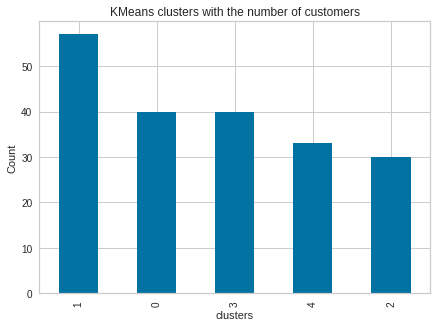

In [75]:
plt.title("KMeans clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df3.cluster_id.value_counts().plot(kind='bar');

In [76]:
df3.groupby("cluster_id").mean()

,Age,Spend_Score
cluster_id,,
0,25.775000,50.775000
1,30.175439,82.350877
2,60.366667,51.166667
3,43.100000,12.200000
4,44.969697,39.151515


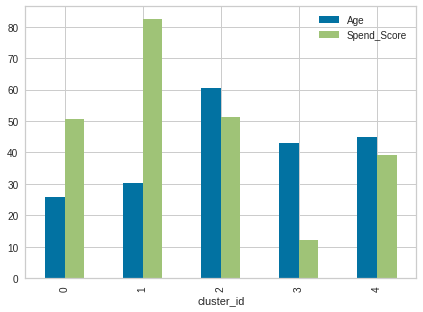

In [77]:
df3.groupby(df3.cluster_id).mean().plot(kind='bar')
plt.show();

In [56]:
df4=df[['Age', 'Annual_Income', 'Spend_Score']]
df4.head()

,Age,Annual_Income,Spend_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram
hc_complete =  linkage(df4,"complete")
hc_ward = linkage(df4, "ward")

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [61]:
from sklearn.cluster import AgglomerativeClustering
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [62]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df4, model_ais.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


### iii. *Visualizing and Labeling All the Clusters* 

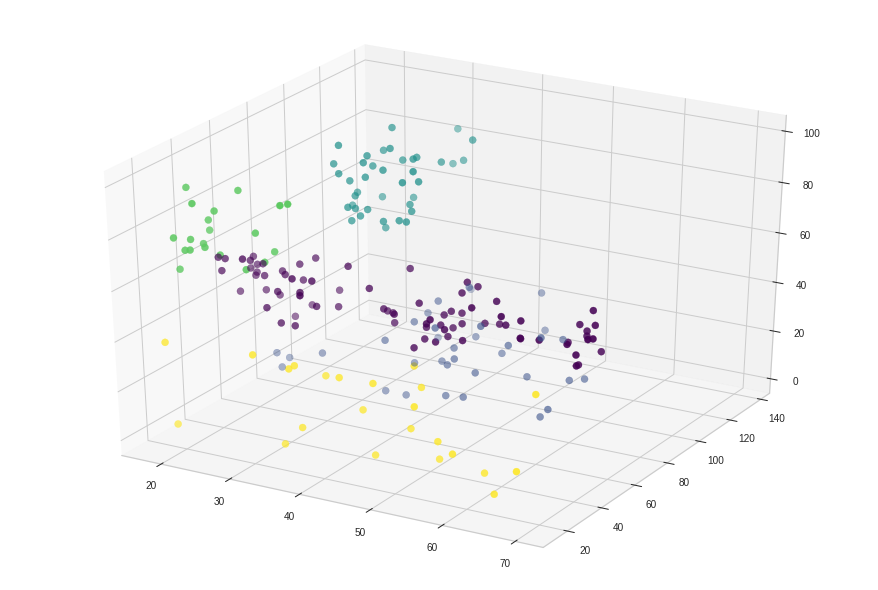

In [63]:
from mpl_toolkits.mplot3d import Axes3D
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)
clusters= model_ais.labels_
centers = model_ais.n_clusters

plt.rcParams["figure.figsize"] =(12,8)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df4.iloc[:,0],df4.iloc[:,1],df4.iloc[:,2],c = clusters, s = 50,cmap = "viridis");

In [64]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df4['cluster_id'] =  model_ais.labels_
trace1 = go.Scatter3d(
    x = df4['Age'],
    y = df4['Spend_Score'],
    z = df4['Annual_Income'],
    mode ='markers',
    marker = dict(color = df4['cluster_id'], size = 6, line = dict(color= df4['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers Segmentation', scene = dict(xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spend Score'), zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

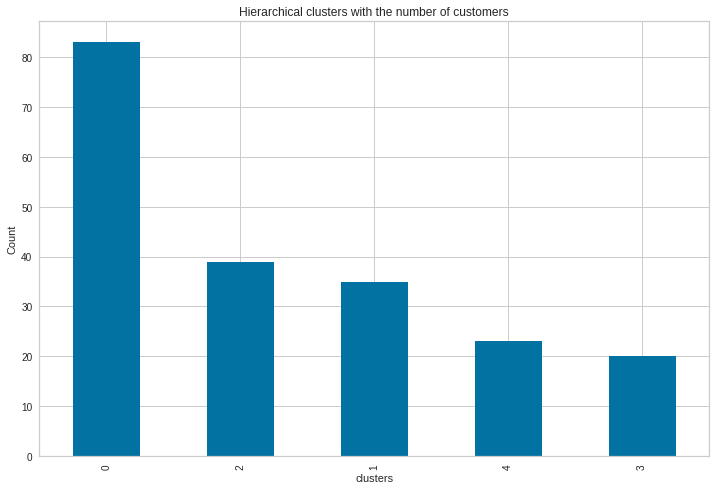

In [65]:
plt.title("Hierarchical clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df4.cluster_id.value_counts().plot(kind='bar');

In [66]:
df4.groupby("cluster_id").mean()

,Age,Annual_Income,Spend_Score
cluster_id,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


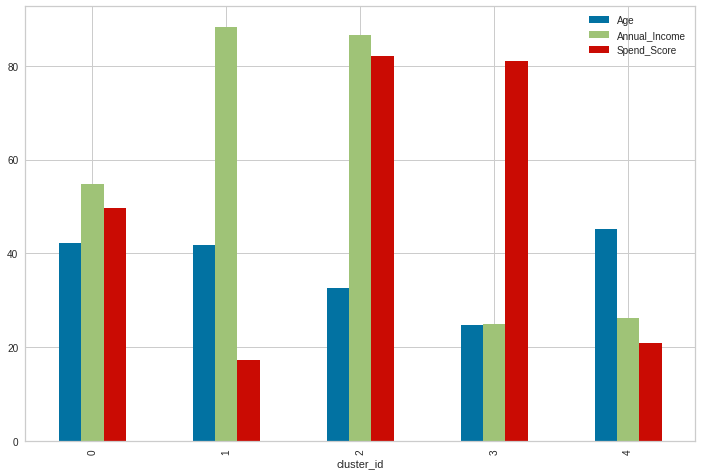

In [67]:
df4.groupby(df4.cluster_id).mean().plot(kind='bar')
plt.show();

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___